In [40]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dataset = 'Aapl'
methods = ['bert', 'word2vec', 'tfidf']
# methods = ['bert', 'word2vec']

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

for method in methods:
    # Read the CSV file for each method
    ss = pd.read_csv(f'{dataset}_{method}_model_results.csv')
    
    # Add a column to identify the method
    ss.insert(0, 'method', method)
    
    # Concatenate the current DataFrame with the overall DataFrame
    results_df = pd.concat([results_df, ss], ignore_index=True)

# Sort the DataFrame by the 'Accuracy' column
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Round the values to one decimal place
results_df = results_df.round(2)

# Print the combined, sorted, and rounded DataFrame
results_df

,method,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score,AUC
0,tfidf,Random Forest,0.73,0.72,0.74,0.67,0.70,0.72
1,tfidf,Voting Ensemble,0.70,0.70,0.70,0.67,0.68,0.70
2,word2vec,Random Forest,0.67,0.67,0.68,0.60,0.64,0.67
3,word2vec,Voting Ensemble,0.67,0.67,0.68,0.59,0.63,0.67
4,tfidf,SVC,0.67,0.67,0.69,0.57,0.62,0.67
5,tfidf,KNN,0.65,0.66,0.63,0.69,0.66,0.66
6,bert,Random Forest,0.65,0.65,0.66,0.56,0.61,0.65
7,bert,Voting Ensemble,0.65,0.64,0.65,0.56,0.61,0.64
8,word2vec,KNN,0.63,0.63,0.62,0.60,0.61,0.63
9,tfidf,Logistic Regression,0.63,0.63,0.63,0.59,0.61,0.63


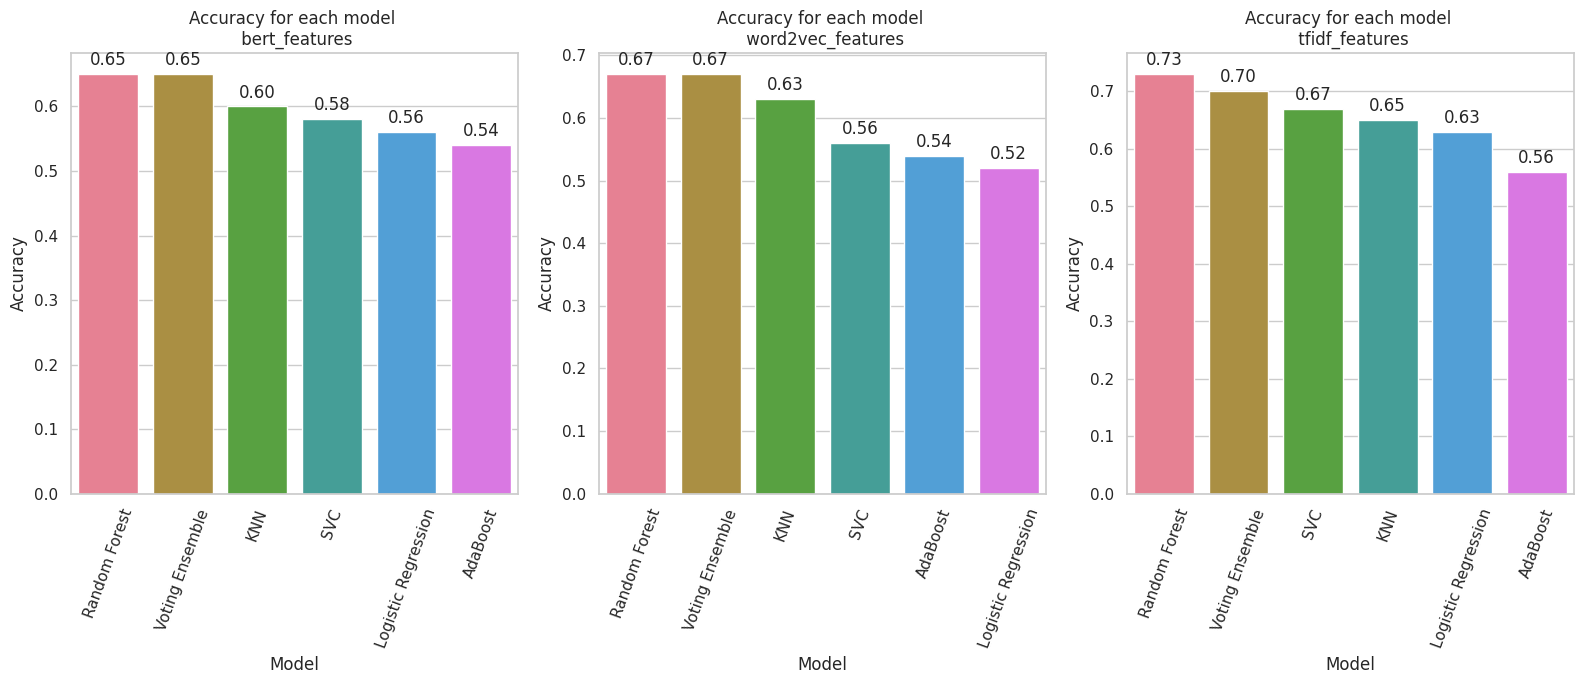

In [42]:
# Define a color palette for each model
palette = sns.color_palette("husl", n_colors=len(results_df['Model'].unique()))

# Create a single plot with 1 row and 3 columns
# fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig, axes = plt.subplots(1, 3, figsize=(16, 7))

# Iterate through each method and create a bar plot in the corresponding subplot
for i, method in enumerate(methods):
    method_df = results_df[results_df['method'] == method]

    ax = sns.barplot(x='Model', y='Accuracy', hue='Model', data=method_df, ax=axes[i], palette=palette, dodge=False, legend=False)
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy for each model \n {method}_features')
    ax.tick_params(axis='x', rotation=70)

    # Display accuracy values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig(f'{dataset}_barplots.png')  # Save the figure
plt.show()

In [44]:
metric = "Accuracy"

#return name of best model according to the metric

best_model = results_df[results_df[metric] == results_df[metric].max()]['Model'].values[0]
best_method = results_df[results_df[metric] == results_df[metric].max()]['method'].values[0]
print(best_method,best_model)

tfidf Random Forest


In [45]:
best_method_predictions = pd.read_csv(f'{dataset}_{best_method}_all_predictions.csv')
best_model_pred = best_method_predictions.filter(like=best_model, axis=1)
best_model_pred

,Predicted Label (Random Forest)
0,1
1,-1
2,-1
3,1
4,1
...,...
14384,-1
14385,-1
14386,1
14387,-1


In [46]:
df = pd.read_pickle(f"../2_features_extraction/{dataset}_{method}_features.pkl")
X = df.iloc[:,2]
y = df.iloc[:, 4]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
x_test.reset_index(drop=True, inplace=True)
x_test

0        breakingnewsforex.com
1                    cnyes.com
2            stylemagazine.com
3           whatsonthorold.com
4             euroinvestor.com
                 ...          
14384                 fool.com
14385                yahoo.com
14386            investing.com
14387             equities.com
14388      businessinsider.com
Name: source, Length: 14389, dtype: object

In [48]:
y_test.reset_index(drop=True, inplace=True)
y_test

0        1
1       -1
2       -1
3       -1
4        1
        ..
14384   -1
14385   -1
14386    1
14387   -1
14388   -1
Name: label, Length: 14389, dtype: int64

In [49]:
new_df = pd.DataFrame()

new_df['source'] = x_test
new_df['y_true'] = y_test
new_df['y_pred'] = best_model_pred

new_df

,source,y_true,y_pred
0,breakingnewsforex.com,1,1
1,cnyes.com,-1,-1
2,stylemagazine.com,-1,-1
3,whatsonthorold.com,-1,1
4,euroinvestor.com,1,1
...,...,...,...
14384,fool.com,-1,-1
14385,yahoo.com,-1,-1
14386,investing.com,1,1
14387,equities.com,-1,-1


In [50]:
new_df['correct_predictions'] = (new_df['y_true'] == new_df['y_pred']).astype(int)
new_df

,source,y_true,y_pred,correct_predictions
0,breakingnewsforex.com,1,1,1
1,cnyes.com,-1,-1,1
2,stylemagazine.com,-1,-1,1
3,whatsonthorold.com,-1,1,0
4,euroinvestor.com,1,1,1
...,...,...,...,...
14384,fool.com,-1,-1,1
14385,yahoo.com,-1,-1,1
14386,investing.com,1,1,1
14387,equities.com,-1,-1,1


In [51]:
# Calculate the total number of correct predictions and total predictions for each source
accuracy_data = new_df.groupby('source').agg(correct_predictions=('correct_predictions', 'sum'), total_predictions=('y_true', 'count')).reset_index()


# Calculate accuracy percentage
accuracy_data['accuracy %'] = (accuracy_data['correct_predictions'] / accuracy_data['total_predictions'])*100
accuracy_data['accuracy %'] = accuracy_data['accuracy %'].round(1)

# # Drop unnecessary columns
# accuracy_data = accuracy_data[['source', 'correct_predictions', 'accuracy %']]

# Remove sources with low total predictions
accuracy_data = accuracy_data[accuracy_data['total_predictions'] >= 75]


# # Sort the DataFrame by the 'correct_predictions' column in descending order
accuracy_data = accuracy_data.sort_values(by='accuracy %', ascending=False).reset_index(drop=True)

accuracy_data.head(10)

,source,correct_predictions,total_predictions,accuracy %
0,marketwatch.com,849,928,91.5
1,morningstar.com,928,1021,90.9
2,investing.com,232,272,85.3
3,zacks.com,321,386,83.2
4,reuters.com,169,208,81.2
5,yahoo.com,1000,1237,80.8
6,fool.com,305,385,79.2
7,nasdaq.com,598,764,78.3
8,barrons.com,167,216,77.3
9,cnn.com,113,147,76.9


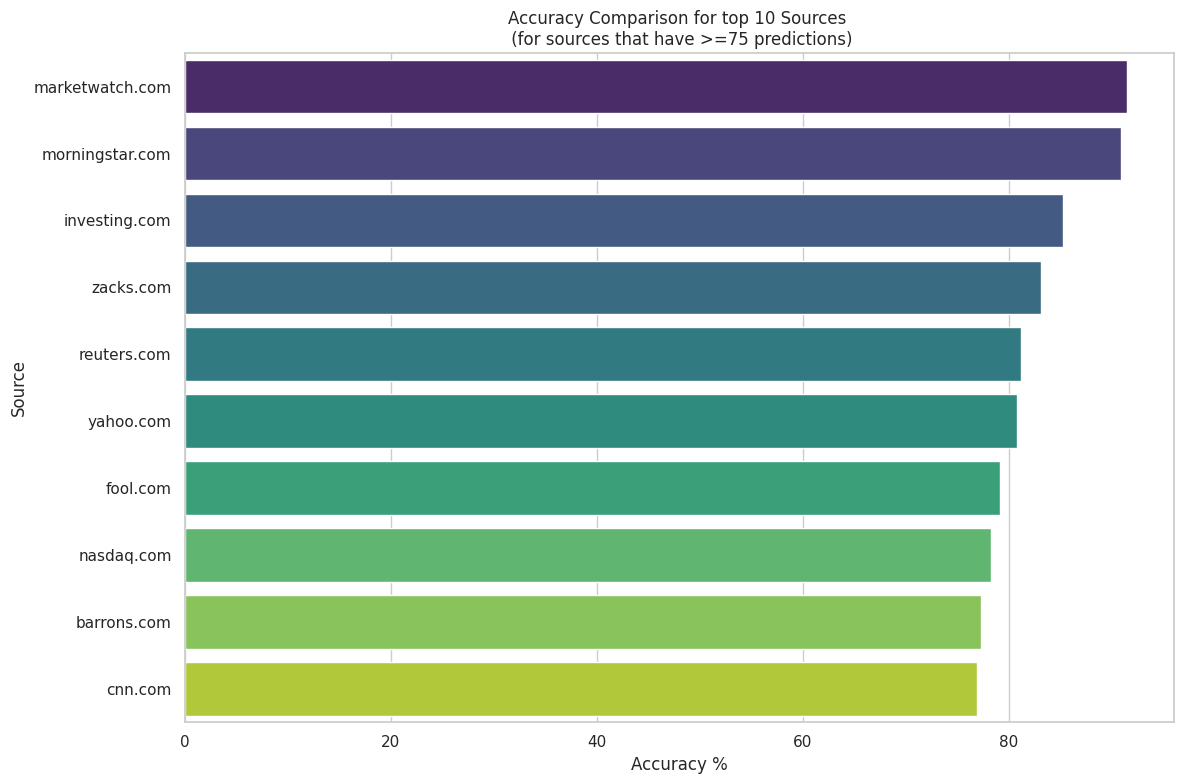

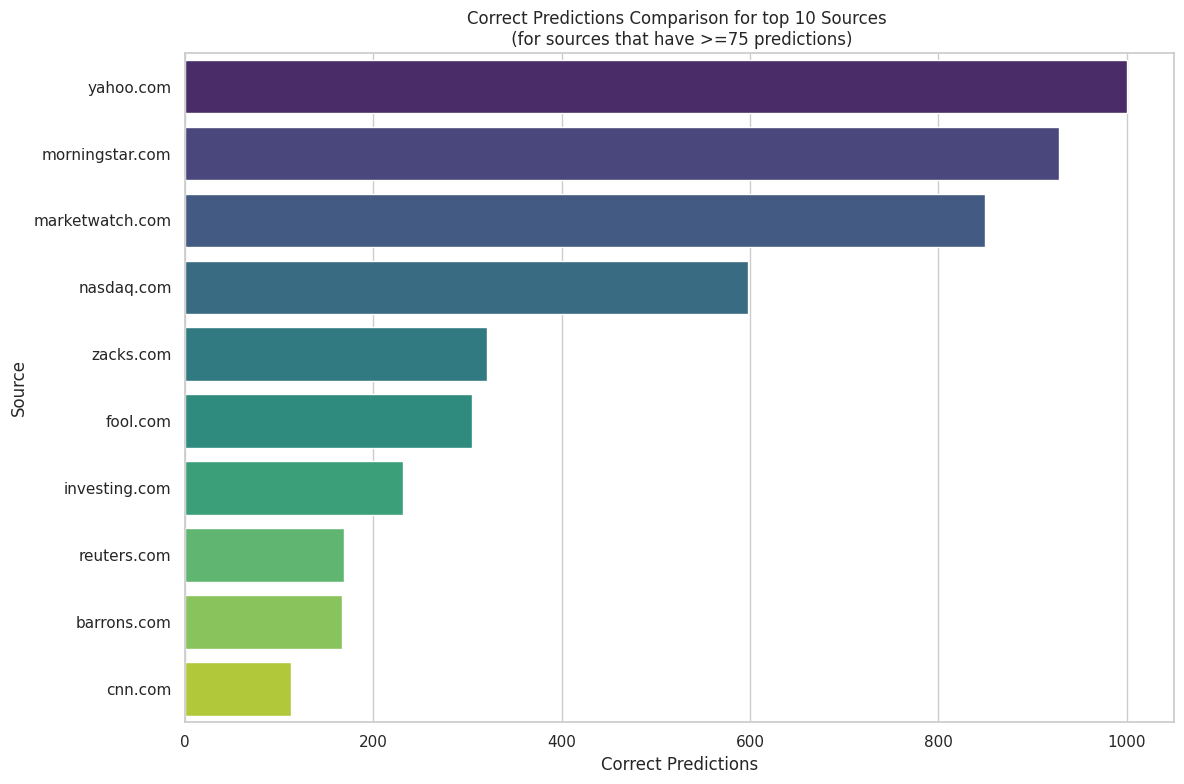

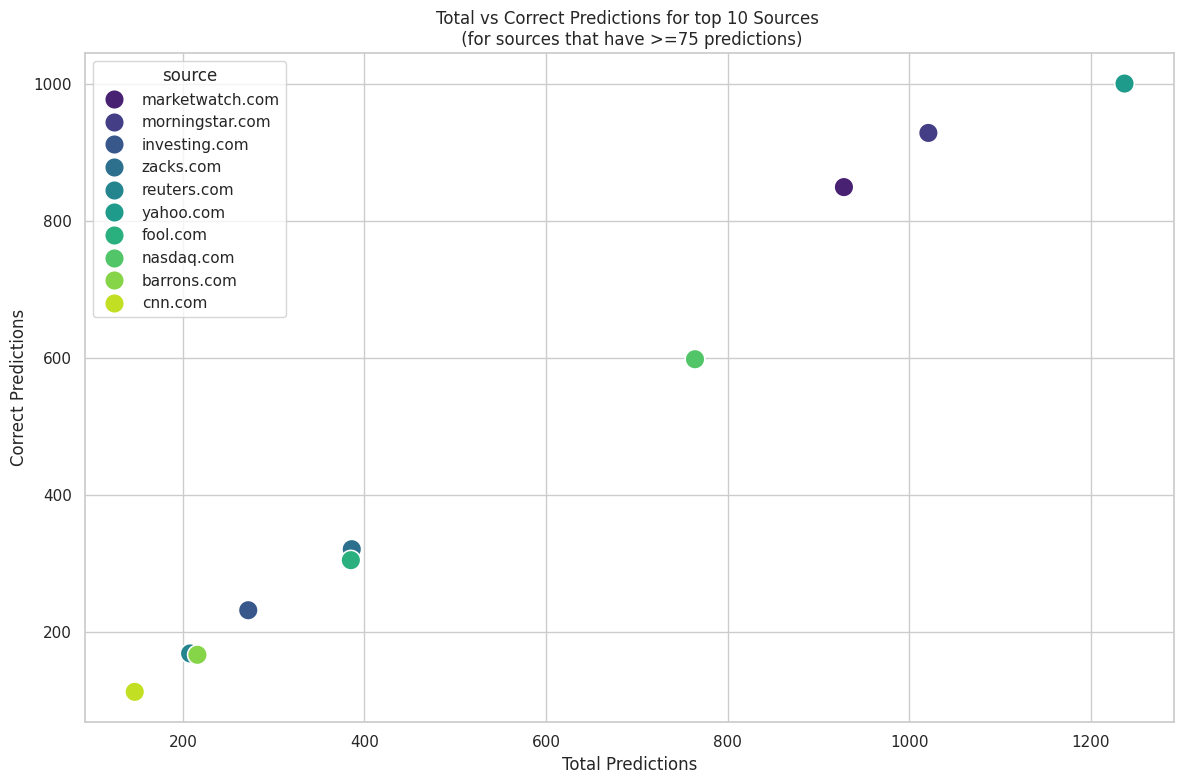

In [52]:
df = accuracy_data[0:10]

sns.set(style="whitegrid")

# Plot 1
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy %', y='source', hue='source', palette='viridis', data=df.sort_values(by='accuracy %', ascending=False))
plt.title('Accuracy Comparison for top 10 Sources \n (for sources that have >=75 predictions)')
plt.xlabel('Accuracy %')
plt.ylabel('Source')
plt.tight_layout()
plt.savefig(f'{dataset}_accuracy_comparison_plot.png')  # Save the figure
plt.show()

# Plot 2
plt.figure(figsize=(12, 8))
sns.barplot(x='correct_predictions', y='source', hue='source', palette='viridis',data=df.sort_values(by='correct_predictions', ascending=False))
plt.title('Correct Predictions Comparison for top 10 Sources \n (for sources that have >=75 predictions)')
plt.xlabel('Correct Predictions')
plt.ylabel('Source')
plt.tight_layout()
plt.savefig(f'{dataset}_correct_predictions_comparison_plot.png')  # Save the figure
plt.show()

# Plot 3
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_predictions', y='correct_predictions', palette='viridis', hue='source', data=df, s=200)
plt.title('Total vs Correct Predictions for top 10 Sources \n (for sources that have >=75 predictions)')
plt.xlabel('Total Predictions')
plt.ylabel('Correct Predictions')
plt.tight_layout()
plt.savefig(f'{dataset}_total_vs_correct_predictions_plot.png')  # Save the figure
plt.show()